In [6]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the standard Advertising dataset

In [7]:
# Data set used in this exercise
data_filename = 'Advertising.csv'

# Read advertising.csv file using the pandas library (using pandas.read_csv)
df = pd.read_csv(data_filename)

#Selecting the predictor and response variables
X = df[['TV']]
y = df['sales']

### Train-Test split

In [8]:
# Split the dataset in training and testing with 60% training set and 40% testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=66)


In [9]:
# Choosing k range 
k_value_min = 1
k_value_max = 20


# creating list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min,k_value_max,num=k_value_max-k_value_min+1, dtype=int)

### Model fit

In [10]:
# creating a dictionary for storing k value against MSE fit {k: MSE@k} 
knn_dict = {}

# Looping over k values
for k_value in k_list:   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=k_value)
            
    # fitting model 
    model.fit(X_train,y_train)
    
    # predictions
    y_pred = model.predict(X_test)
    
    # Calculating MSE 
    MSE = mean_squared_error(y_test, y_pred, squared=True)
    
    #Storing the MSE values of each k value in a dictionary
    knn_dict[k_value] = MSE

### Graph plot

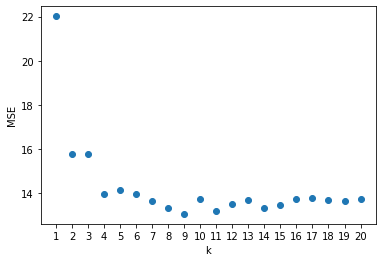

In [12]:
# Plot k against MSE
plt.figure()
plt.scatter(knn_dict.keys(), knn_dict.values())
plt.xlabel('k')
plt.ylabel('MSE')
plt.xticks(np.arange(1,21))
plt.show();

### Find the best knn model

In [21]:
# Looking for k with minimum MSE
min_mse = min(knn_dict.values())
best_model = [key  for (key, value) in knn_dict.items() if value == min_mse]
print ("The best k value is ",best_model[0],"with a MSE of ", min_mse)

The best k value is  9 with a MSE of  13.045483024691356
